## MS-SMC' examine bias from approximation

This notebook investigates a potential bias in topology-change waiting distance estimation that can arise from intervening tree-change events. To investigate this we perform two analyses under a range of species tree scenarios. We ask how different the P(topology-change | S,G) is between two genealogies on either side of a tree-change event. We also ask how different this is between two trees at the beginning versus end of a waiting distance interval.


In [1]:
from pathlib import Path
import numpy as np
import toyplot, toyplot.png

### Output folder

In [2]:
# ensure output folder exists
OUTDIR = Path("../manuscript/figures/bias-fold-plots-2024-final/")
OUTDIR.mkdir(exist_ok=True)

### Run batch script

In [3]:
## usage: python validate-x5.py ncores outname
# ! python ../batch-scripts/validate-x5.py 30 ../batch-scripts/bias-fold-full

### Plot results

In [4]:
def plot_bias(arr: np.ndarray, title: str = ""):
    canvas = toyplot.Canvas(width=400, height=225)
    axes = canvas.cartesian(margin=65)

    # plot subpanel title (to help place into multi-panel figure)
    canvas.text(50, 50, f"{title}", style={"text-anchor": "start"})
    
    # plot marks
    axes.hlines([1.0], style={"stroke-dasharray": "6,6", "stroke-width": 2})
    axes.text(1, 4, "Variance", color="black", style={"font-size": 14, "font-weight": 600})

    for i in range(3):
        axes.scatterplot(
            np.random.uniform(i - 0.15, i + 0.15, size=arr.shape[0]), arr[:, i],
            opacity=0.15, #mstyle={"stroke": "black"}
        )
        axes.text(i, 3, f"{arr[:, i].var():.3f}", color="black", style={"font-size": 14})
        
    # style axes
    axes.y.label.text = "Fold change"
    axes.y.ticks.locator = toyplot.locator.Explicit([0, 1, 2, 3, 4])
    axes.y.domain.max = 4
    axes.y.label.offset = 35

    axes.x.ticks.locator = toyplot.locator.Explicit([0, 1, 2], ["L(G)", "P(topo)", "L(G) x P(topo)"])
    axes.x.domain.min = -0.5
    axes.x.domain.max = 2.5

    for ax in (axes.x, axes.y):
        ax.domain.show = False
        ax.ticks.show = True
        ax.ticks.near = 7.5
        ax.ticks.far = 0
        ax.ticks.labels.offset = 12
        ax.ticks.labels.style["font-size"] = 14
        ax.label.style["font-size"] = 16
        ax.ticks.style["stroke-width"] = 3
        ax.spine.style["stroke-width"] = 3
    return canvas

### Example
This function plots results grouped across all 1000 loci, and then separated by Ne value and number of samples per tip. For example, `arr[:, :, 0, 0]` corresponds to `arr[:, :, Ne, nsamps-multiplier]` and selects the lowest Ne and lowest number of samples per tip for that tree. For the first example below, `arr[:, :, 0, 0`] selects a two tip tree with Ne=50,000 and nsamps=4. The result is shown for the array data generated using `first_tree=True` and also for `first_tree=False`. 

In the next cell down, we show the result for an 8-tip tree. Here, when we select the lowest Ne and lowest number of samples per tip, we expect that this shows the greatest amount of error possible. By increasing Ne or nsamples per tip the error is decreased. This is shown in the next cell down, which samples 4X as many tips per species, and shows much lower error.

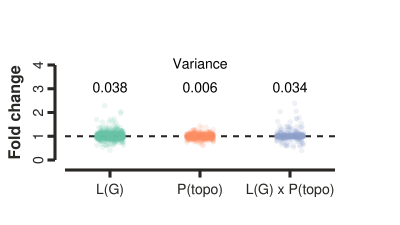

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="225.0px" viewBox="0 0 400.0 225.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t10574c5bc1594ebf82d19ff500897e3a"> Variance <g style="fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity:0.15;stroke:rgb(40%,76.1%,64.

In [5]:
# difference between first and second tree between tree-change event
arr = np.load("../batch-scripts/bias-fold-p2-s4-f0.npy")
plot_bias(arr[:, :, 0, 0])

# difference between first and last trees in topo-change interval
arr = np.load("../batch-scripts/bias-fold-p2-s4-f1.npy")
plot_bias(arr[:, :, 0, 0])

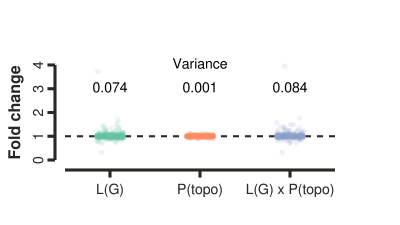

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="225.0px" viewBox="0 0 400.0 225.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t122d791543eb44658ef9f26156066e70"> Variance <g style="fill:rgb(40%,76.1%,64.7%);fill-opac

In [6]:
# difference between first and second tree between tree-change event
arr = np.load("../batch-scripts/bias-fold-p8-s1-f0.npy")
plot_bias(arr[:, :, 0, 0])

# difference between first and last trees in topo-change interval
arr = np.load("../batch-scripts/bias-fold-p8-s1-f1.npy")
plot_bias(arr[:, :, 0, 0])

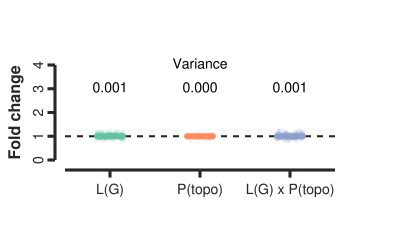

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="225.0px" viewBox="0 0 400.0 225.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tfc89113904b54b3fa7c685e10e3c1a64"> Variance <g style="fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity:0.15;stroke:rgb(40%,76.1%,64.7%);stroke-opacity:1.0" class

In [7]:
# difference between first and second tree between tree-change event
arr = np.load("../batch-scripts/bias-fold-p8-s1-f0.npy")
plot_bias(arr[:, :, 0, 2])

# difference between first and last trees in topo-change interval
arr = np.load("../batch-scripts/bias-fold-p8-s1-f1.npy")
plot_bias(arr[:, :, 0, 2])

In [8]:
toyplot.config.autorender = False
SETUPS = [(1, 8), (2, 4), (8, 1)]
for nspecies, nsamps in SETUPS:
    for first_tree in [True, False]:
        arr = np.load(f"../batch-scripts/bias-fold-p{nspecies}-s{nsamps}-f{int(first_tree)}.npy")
        for nidx, neff in enumerate([50_000, 100_000, 500_000]):
            for nsa, nsamples in enumerate([1, 2, 4]):
                title = f"ns{nspecies}-ne{nidx}-s{nsa}-f{int(first_tree)}"
                canvas = plot_bias(arr[:, :, nidx, nsa], title)
                toyplot.png.render(
                    canvas,
                    str(OUTDIR / f"bias-fold-neff{nidx}-p{nspecies}-s{nsamps}-ne{nidx}-mult{nsa}-f{int(first_tree)}.png")
                )